In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !importiant; )</style>"))
import warnings
warnings.simplefilter(action='ignore')

from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.DESCR)

data, feats, y = data.data, data.feature_names, data.target
df = pd.DataFrame(data, columns=feats)
df["MedHouseValue"] = y


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
print(df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.153956  
min        0.692308     32.5

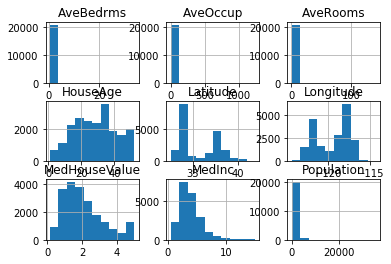

In [7]:
df.hist()
plt.show()

In [14]:
type(data)

numpy.ndarray

In [17]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
MedInc           20640 non-null float64
HouseAge         20640 non-null float64
AveRooms         20640 non-null float64
AveBedrms        20640 non-null float64
Population       20640 non-null float64
AveOccup         20640 non-null float64
Latitude         20640 non-null float64
Longitude        20640 non-null float64
MedHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseValue,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


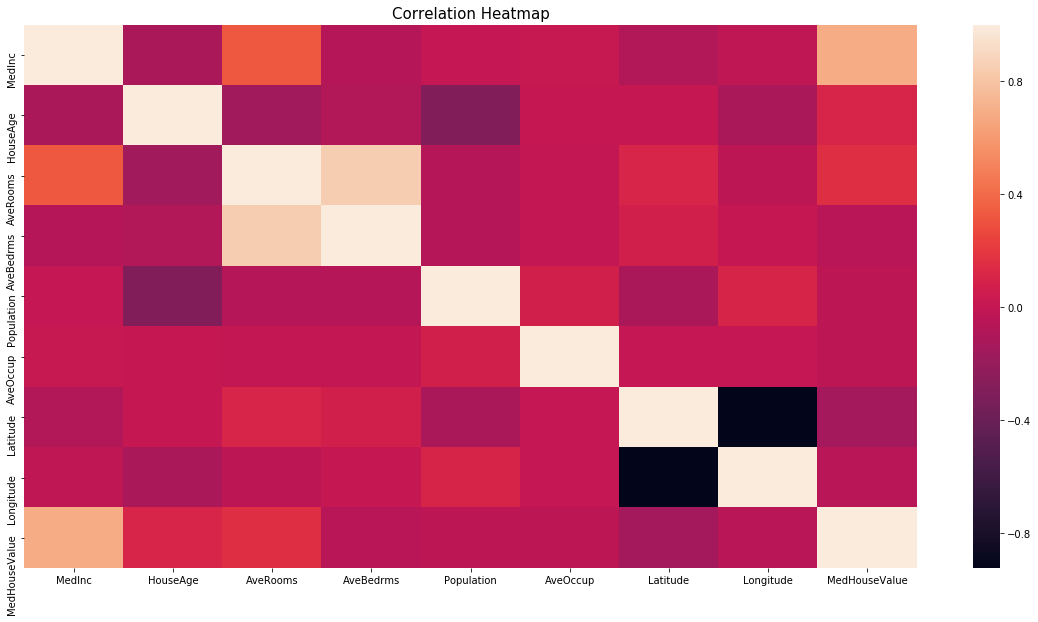

In [29]:
plt.figure(figsize=(20,10))
ax=plt.axes()
corr=df.corr()
sns.heatmap(corr, ax=ax,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)
ax.set_title('Correlation Heatmap',fontsize=15)
plt.show()

Text(0.5,1.05,'Scatter Plot')

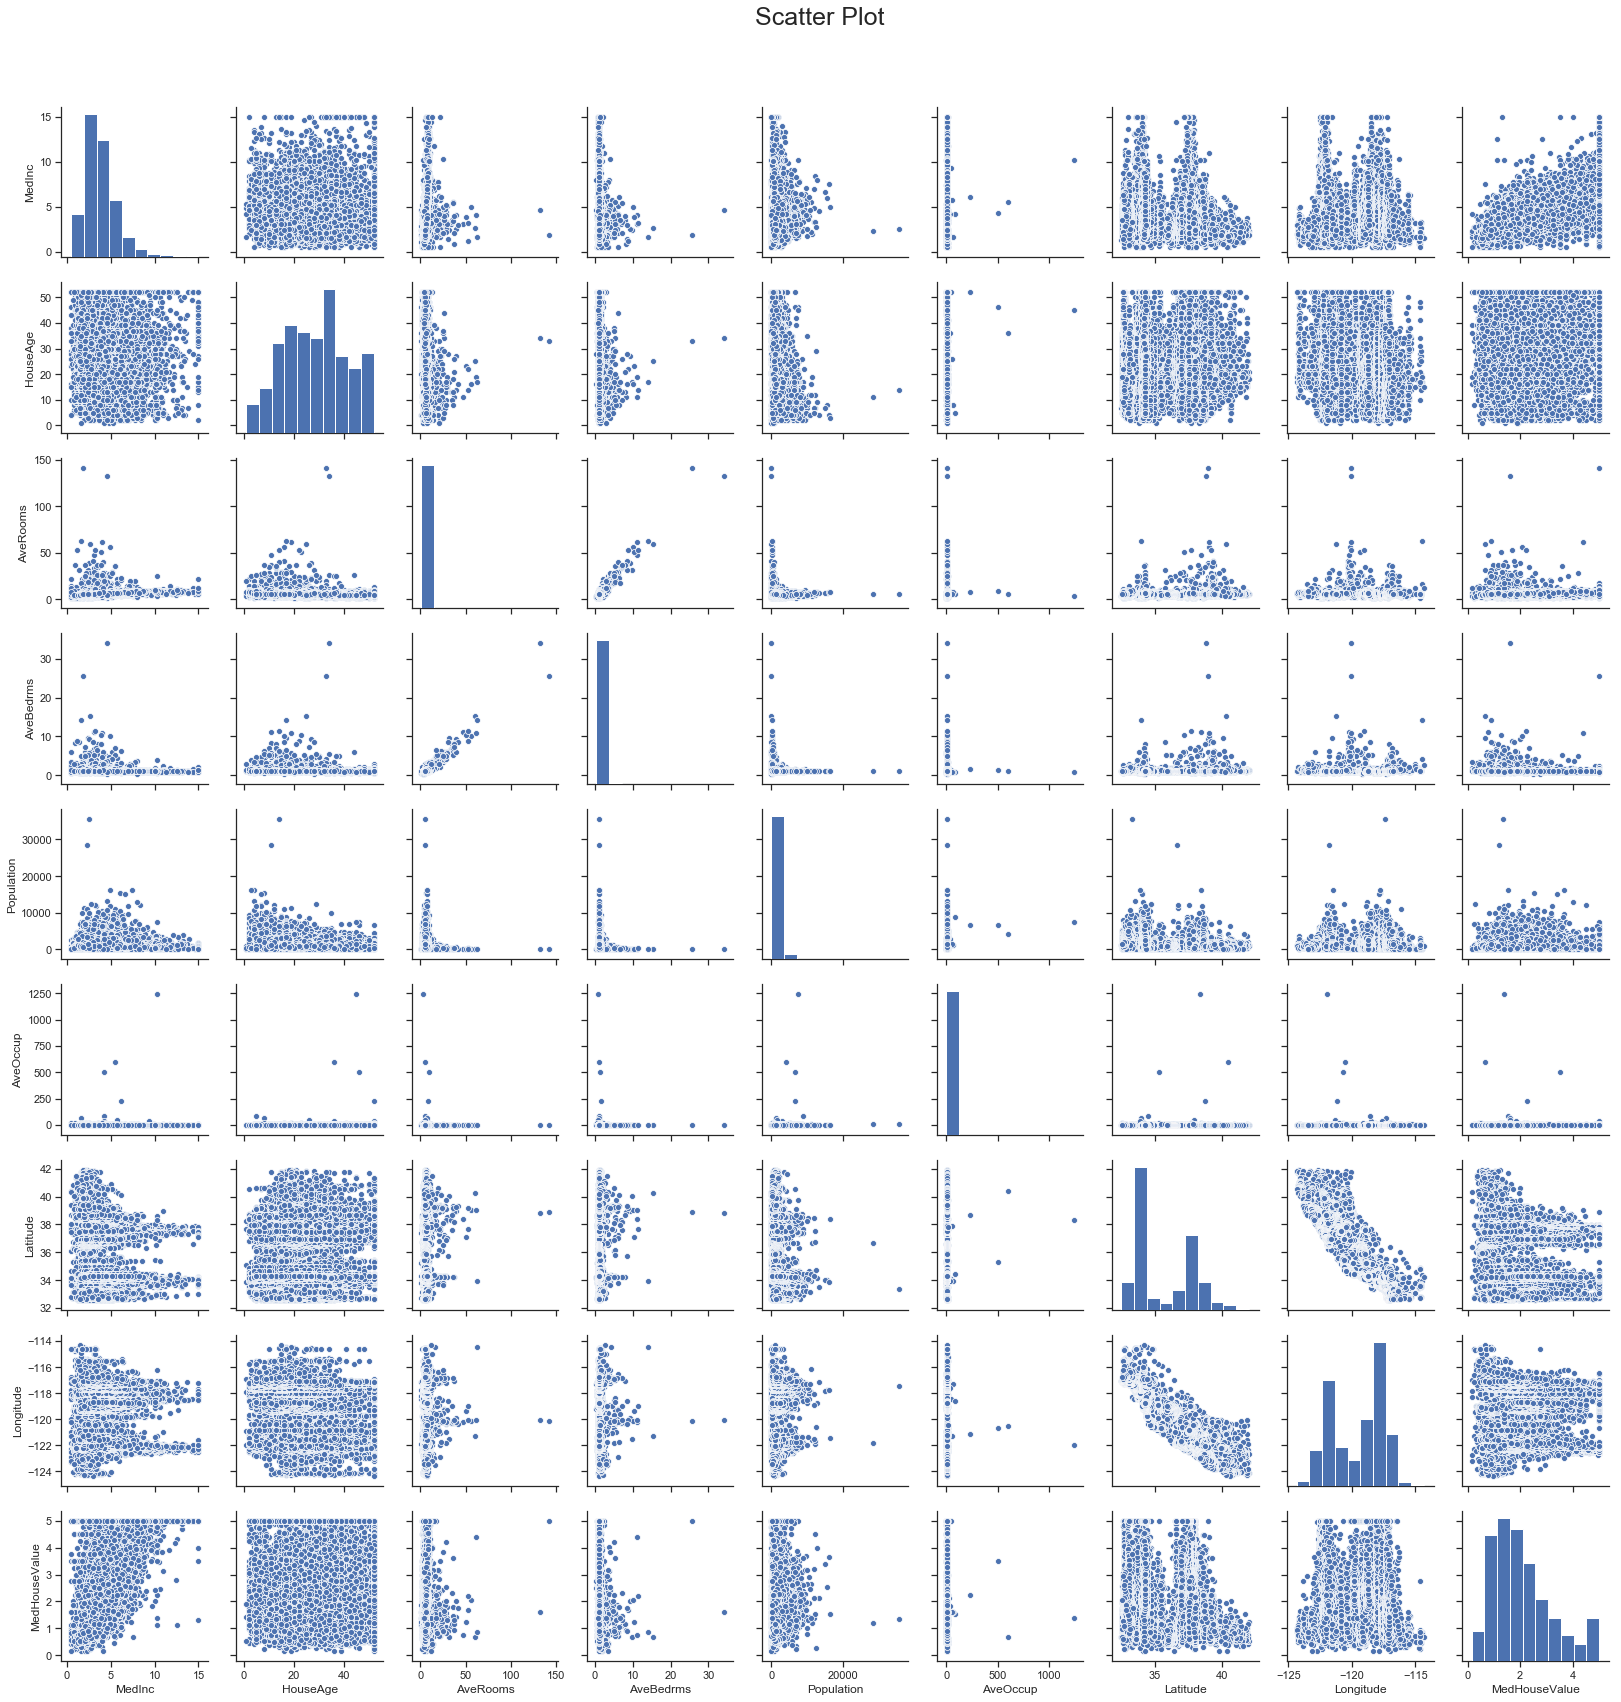

In [30]:
sns.set(style="ticks")
sns.pairplot(df).fig.suptitle("Scatter Plot",y=1.05, fontsize=25)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
data_train, data_test= train_test_split(df, test_size=0.20,shuffle=True, random_state=42)
X_train = data_train[feats].values
X_test = data_test[feats].values

Y_train =data_train["MedHouseValue"]
Y_test =data_test["MedHouseValue"]

lr = LinearRegression().fit(X_train,Y_train)
MedHouseValue_pred = lr.predict(X_test)
MedHouseValue_pred_train = lr.predict(X_train)

print('Coefficients: \n', lr.coef_)
print("Train : Mean squared error: %.2f"
     % mean_squared_error(Y_train, MedHouseValue_pred_train))
print("Test : Mean squared error: %.2f"
     % mean_squared_error(Y_test, MedHouseValue_pred))

print('Train : Varience Score: %.2f' % r2_score(Y_train, MedHouseValue_pred_train))
print('Test : Varience score: %2f' %r2_score(Y_test, MedHouseValue_pred))


('Coefficients: \n', array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01]))
Train : Mean squared error: 0.52
Test : Mean squared error: 0.56
Train : Varience Score: 0.61
Test : Varience score: 0.575788


<function matplotlib.pyplot.show>

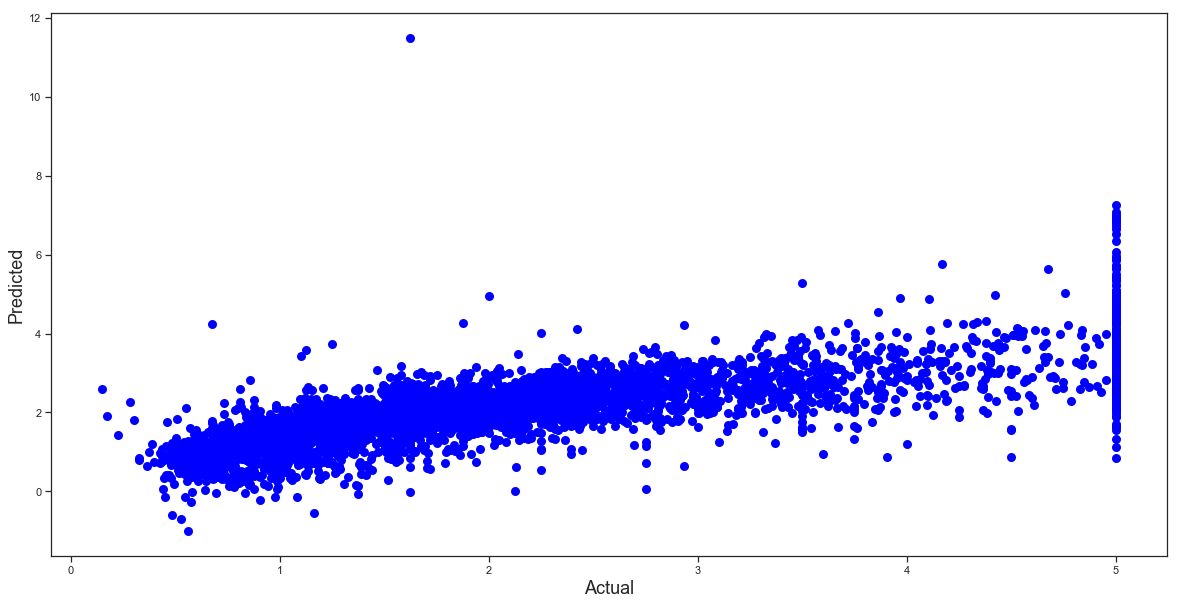

In [48]:
import pandas as pd
plt.figure(figsize=(20,10))
plt.scatter(Y_test, MedHouseValue_pred, color='blue', linewidth=3)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.show

In [49]:
print(list(zip(lr.coef_,feats)))

[(0.44867490966571744, 'MedInc'), (0.009724257517905463, 'HouseAge'), (-0.12332334282795905, 'AveRooms'), (0.7831449067929711, 'AveBedrms'), (-2.02962058015139e-06, 'Population'), (-0.003526318487134081, 'AveOccup'), (-0.41979248658836, 'Latitude'), (-0.4337080649639872, 'Longitude')]


In [50]:
lr.coef_

array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
       -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01])

In [51]:
for i in df.columns:
    df[1]=np.log(df[i]+1)

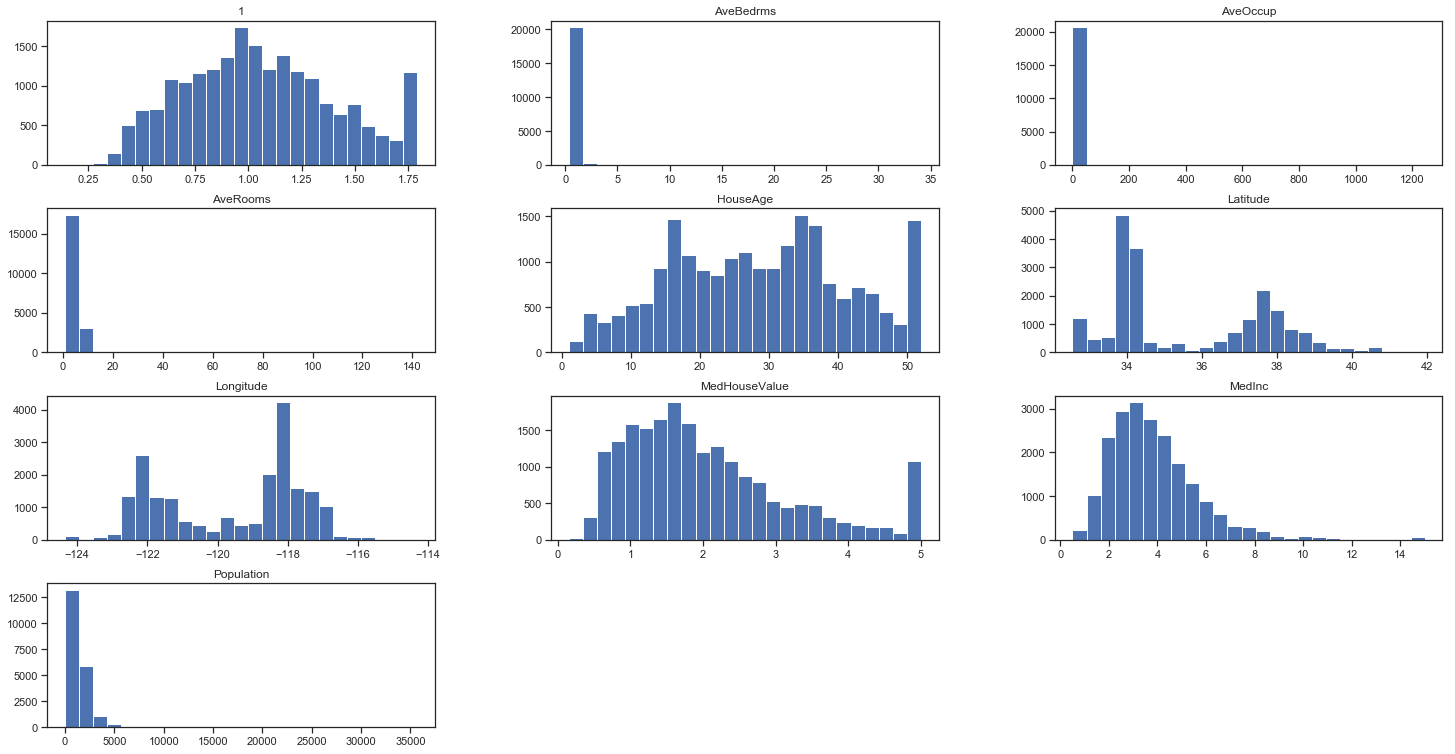

In [54]:
import pandas as pd
df.hist(figsize=(25,13), bins=25, grid=False)
plt.show()

In [61]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

for i in [1,2,3,4,5,6,7,8,9,10]:
    ridgReg = Ridge(alpha=i)
    ridgReg.fit(X_train, Y_train)
    MedianHousevalue_pred = ridgReg.predict(X_test)
    MedianHousevalue_pred_train = ridgReg.predict(X_train)
    print("Varience Score for Alpha = " + str(i) + "Ridge in Training Data is = "+ str(round(r2_score(Y_train,MedianHousevalue_pred_train),2)))
    print("Varience Score for Alpha = " + str(i) + "Ridge in Test Data is = "+ str(round(r2_score(Y_test,MedianHousevalue_pred),2)))
    
    print(" MSE fopr Alpha =" + str(i) + "Ridge in Training Data is :" + str(round(mean_squared_error(Y_train, MedianHousevalue_pred_train),2)))
    print(" MSE fopr Alpha =" + str(i) + "Ridge in Test Data is :" + str(round(mean_squared_error(Y_test, MedianHousevalue_pred),2)))
 

Varience Score for Alpha = 1Ridge in Training Data is = 0.61
Varience Score for Alpha = 1Ridge in Test Data is = 0.58
 MSE fopr Alpha =1Ridge in Training Data is :0.52
 MSE fopr Alpha =1Ridge in Test Data is :0.56
Varience Score for Alpha = 2Ridge in Training Data is = 0.61
Varience Score for Alpha = 2Ridge in Test Data is = 0.58
 MSE fopr Alpha =2Ridge in Training Data is :0.52
 MSE fopr Alpha =2Ridge in Test Data is :0.56
Varience Score for Alpha = 3Ridge in Training Data is = 0.61
Varience Score for Alpha = 3Ridge in Test Data is = 0.58
 MSE fopr Alpha =3Ridge in Training Data is :0.52
 MSE fopr Alpha =3Ridge in Test Data is :0.56
Varience Score for Alpha = 4Ridge in Training Data is = 0.61
Varience Score for Alpha = 4Ridge in Test Data is = 0.58
 MSE fopr Alpha =4Ridge in Training Data is :0.52
 MSE fopr Alpha =4Ridge in Test Data is :0.56
Varience Score for Alpha = 5Ridge in Training Data is = 0.61
Varience Score for Alpha = 5Ridge in Test Data is = 0.58
 MSE fopr Alpha =5Ridge in

In [64]:
from sklearn.linear_model import Lasso

for i in [.01, .05, .1, .15, .2]:
    lassoReg = Lasso(alpha=i)
    lassoReg.fit(X_train, Y_train)
    MedianHousevalue_pred = lassoReg.predict(X_test)
    MedianHousevalue_pred_train = lassoReg.predict(X_train)
    print("Varience Score for Alpha = " + str(i) + " Lasso in Training Data is = "+ str(round(r2_score(Y_train,MedianHousevalue_pred_train),2)))
    print("Varience Score for Alpha = " + str(i) + " Lasso in Test Data is = "+ str(round(r2_score(Y_test,MedianHousevalue_pred),2)))

    print(" MSE fopr Alpha =" + str(i) + " Lasso in Training Data is :" + str(round(mean_squared_error(Y_train, MedianHousevalue_pred_train),2)))
    print(" MSE fopr Alpha =" + str(i) + " Lasso in Test Data is :" + str(round(mean_squared_error(Y_test, MedianHousevalue_pred),2)))
    dict.update( {lassoReg : round(r2_score(Y_test, MedianHousevalue_pred),2)} )

Varience Score for Alpha = 0.01 Lasso in Training Data is = 0.61
Varience Score for Alpha = 0.01 Lasso in Test Data is = 0.58
 MSE fopr Alpha =0.01 Lasso in Training Data is :0.52
 MSE fopr Alpha =0.01 Lasso in Test Data is :0.54
Varience Score for Alpha = 0.05 Lasso in Training Data is = 0.59
Varience Score for Alpha = 0.05 Lasso in Test Data is = 0.57
 MSE fopr Alpha =0.05 Lasso in Training Data is :0.55
 MSE fopr Alpha =0.05 Lasso in Test Data is :0.56
Varience Score for Alpha = 0.1 Lasso in Training Data is = 0.55
Varience Score for Alpha = 0.1 Lasso in Test Data is = 0.53
 MSE fopr Alpha =0.1 Lasso in Training Data is :0.6
 MSE fopr Alpha =0.1 Lasso in Test Data is :0.61
Varience Score for Alpha = 0.15 Lasso in Training Data is = 0.51
Varience Score for Alpha = 0.15 Lasso in Test Data is = 0.5
 MSE fopr Alpha =0.15 Lasso in Training Data is :0.65
 MSE fopr Alpha =0.15 Lasso in Test Data is :0.66
Varience Score for Alpha = 0.2 Lasso in Training Data is = 0.51
Varience Score for Alp

In [67]:
from sklearn.neighbors import  KNeighborsRegressor
for i in [1, 3, 5, 20, 23, 25]:
    knnReg = KNeighborsRegressor( metric='euclidean', weights= 'distance', n_neighbors=i)
    knnReg.fit(X_train, Y_train)
    MedianHousevalue_pred = knnReg.predict(X_test)
    MedianHousevalue_pred_train = knnReg.predict(X_train)
    print("Varience Score for Alpha = " + str(i) + " Nearest Neighbor in Training Data is = "+ str(round(r2_score(Y_train,MedianHousevalue_pred_train),2)))
    print("Varience Score for Alpha = " + str(i) + " Nearest Neighbor in Test Data is = "+ str(round(r2_score(Y_test,MedianHousevalue_pred),2)))

    print(" MSE fopr Alpha =" + str(i) + " Nearest Neighbor in Training Data is :" + str(round(mean_squared_error(Y_train, MedianHousevalue_pred_train),2)))
    print(" MSE fopr Alpha =" + str(i) + " Nearest Neighbor in Test Data is :" + str(round(mean_squared_error(Y_test, MedianHousevalue_pred),2)))
    dict.update( {knnReg : round(r2_score(Y_test, MedianHousevalue_pred),2)} )

Varience Score for Alpha = 1 Nearest Neighbor in Training Data is = 1.0
Varience Score for Alpha = 1 Nearest Neighbor in Test Data is = -0.18
 MSE fopr Alpha =1 Nearest Neighbor in Training Data is :0.0
 MSE fopr Alpha =1 Nearest Neighbor in Test Data is :1.55
Varience Score for Alpha = 3 Nearest Neighbor in Training Data is = 1.0
Varience Score for Alpha = 3 Nearest Neighbor in Test Data is = 0.13
 MSE fopr Alpha =3 Nearest Neighbor in Training Data is :0.0
 MSE fopr Alpha =3 Nearest Neighbor in Test Data is :1.14
Varience Score for Alpha = 5 Nearest Neighbor in Training Data is = 1.0
Varience Score for Alpha = 5 Nearest Neighbor in Test Data is = 0.17
 MSE fopr Alpha =5 Nearest Neighbor in Training Data is :0.0
 MSE fopr Alpha =5 Nearest Neighbor in Test Data is :1.09
Varience Score for Alpha = 20 Nearest Neighbor in Training Data is = 1.0
Varience Score for Alpha = 20 Nearest Neighbor in Test Data is = 0.16
 MSE fopr Alpha =20 Nearest Neighbor in Training Data is :0.0
 MSE fopr Alph